# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Load and Explore the Dataset

In [7]:
df = pd.read_csv("Iris.csv")
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Preprocess the Data

In [10]:
# Drop the ID column
df.drop('Id', axis=1, inplace=True)

# Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#  Splitting the Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# Train KNN and Test for Different K Values

In [22]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")


K=1, Accuracy=0.98
K=2, Accuracy=0.98
K=3, Accuracy=1.00
K=4, Accuracy=0.98
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00


# Plot Accuracy vs K

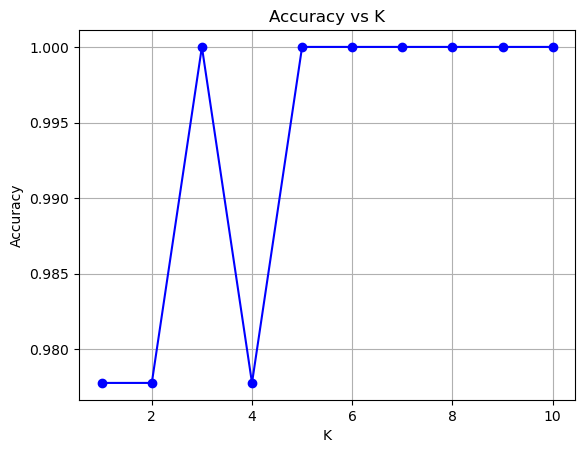

In [26]:
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


# Evaluate Best K Using Confusion Matrix

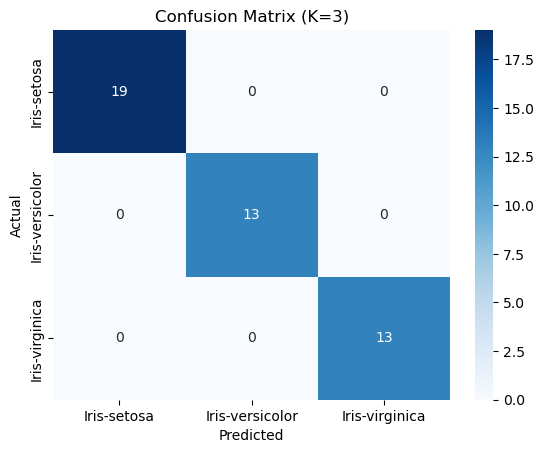

In [29]:
best_k = k_values[np.argmax(accuracies)]
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix (K={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Visualize Decision Boundaries 

In [40]:
# Use only two features for visualization
X_viz = df[['PetalLengthCm', 'PetalWidthCm']]
X_viz_scaled = scaler.fit_transform(X_viz)
y_viz = label_encoder.transform(df['Species'])

# Fit model on 2D data
knn_viz = KNeighborsClassifier(n_neighbors=best_k)
knn_viz.fit(X_viz_scaled, y_viz)

# Create meshgrid
x_min, x_max = X_viz_scaled[:, 0].min() - 1, X_viz_scaled[:, 0].max() + 1
y_min, y_max = X_viz_scaled[:, 1].min() - 1, X_viz_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)





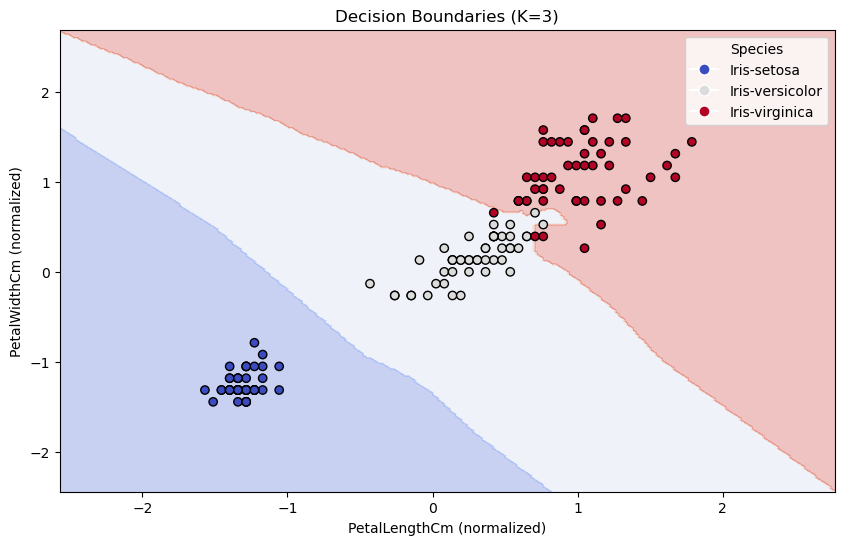

In [50]:
# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_viz_scaled[:, 0], X_viz_scaled[:, 1], c=y_viz, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('PetalLengthCm (normalized)')
plt.ylabel('PetalWidthCm (normalized)')
plt.title(f'Decision Boundaries (K={best_k})')
# Custom legend
legend_labels = label_encoder.classes_
legend_handles = [plt.Line2D([0], [0], marker='o', color='w',
                              label=label, markerfacecolor=plt.cm.coolwarm(i / 2), markersize=8)
                  for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title="Species")
plt.show()